In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import seaborn as sns
import scvelo as scv
import matplotlib.pyplot as plt
#from moscot.problems.time import TemporalNeuralProblem, TemporalProblem

## # Remove cells with too little splicing information

In [2]:
Path='/home/mgander/pancreas_multiome/data2'

adata=sc.read_h5ad(f'{Path}/intestine_scpoli_integration.h5ad')
adata

AnnData object with n_obs × n_vars = 368439 × 1807
    obs: 'sort_batch', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'pct_counts_hb', 'n_genes', 'sample_id', 'level_1', 'level_2', 'level_3', 'initial_size_spliced', 'initial_size_unspliced', 'initial_size', 'batch', 'publication', 'sample_name', 'tissue', 'derive', 'detail_tissue', 'time', 'time2', 'main_cells', 'protocol', 'tech', 'tech_detail', 'molecular', 'gel', 'leiden'
    uns: 'leiden', 'log1p', 'neighbors', 'umap'
    obsm: 'X_scPoli', 'X_umap', 'X_umap_min', 'X_umap_sc'
    layers: 'ambiguous', 'counts', 'spliced', 'unspliced'
    obsp: 'connectivities', 'distances'

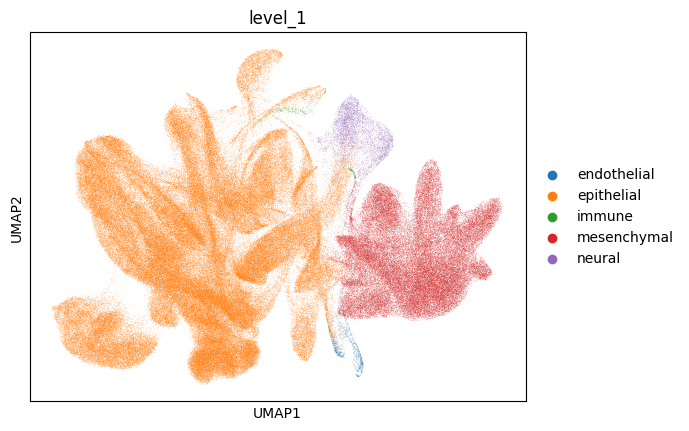

In [3]:
sc.pl.umap(adata, color='level_1')

In [3]:
adata.obs['day']=[float(str(a).split('day')[0]) if str(a) not in ['early', 'late', 'NA', 'NaN'] else np.NaN for a in adata.obs['time'] ]

In [5]:
# Remove cells with too little spliced/unspliced counts

wh0=np.asarray(adata.layers['spliced'].sum(1)).flatten()>100
wh1=np.asarray(adata.layers['unspliced'].sum(1)).flatten()>100
wh=wh0&wh1

adata=adata[wh].copy()
adata

AnnData object with n_obs × n_vars = 170004 × 1807
    obs: 'sort_batch', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'pct_counts_hb', 'n_genes', 'sample_id', 'level_1', 'level_2', 'level_3', 'initial_size_spliced', 'initial_size_unspliced', 'initial_size', 'batch', 'publication', 'sample_name', 'tissue', 'derive', 'detail_tissue', 'time', 'time2', 'main_cells', 'protocol', 'tech', 'tech_detail', 'molecular', 'gel', 'leiden', 'day'
    uns: 'leiden', 'log1p', 'neighbors', 'umap', 'level_1_colors'
    obsm: 'X_scPoli', 'X_umap', 'X_umap_min', 'X_umap_sc'
    layers: 'ambiguous', 'counts', 'spliced', 'unspliced'
    obsp: 'connectivities', 'distances'

In [ ]:
adata.obs['level_1']=adata.obs['level_1'].astype('category')
adata=adata[adata.obs['level_1']=='epithelial'].copy()
adata

In [7]:
adata.obsm['X_umap_initial']=adata.obsm['X_umap'].copy()

del adata.obsp
del adata.uns['neighbors']
sc.pp.neighbors(adata, use_rep='X_scPoli')
sc.tl.umap(adata)

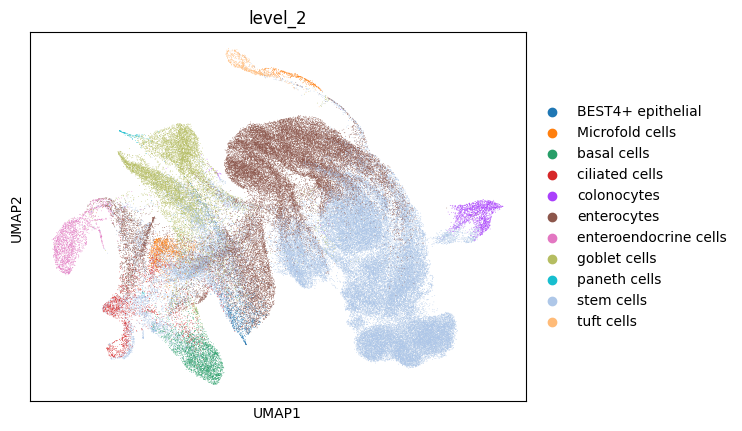

In [9]:
sc.pl.umap(adata, color='level_2')

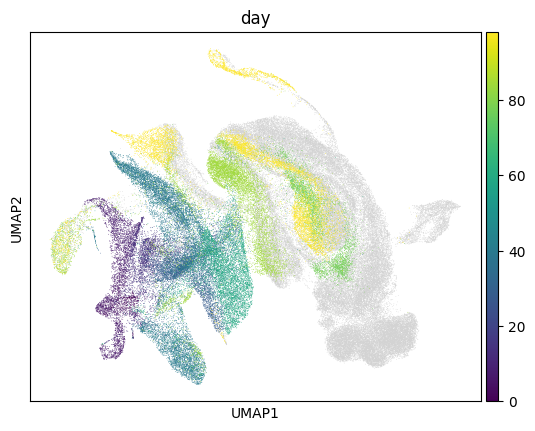

In [10]:
sc.pl.umap(adata, color='day')

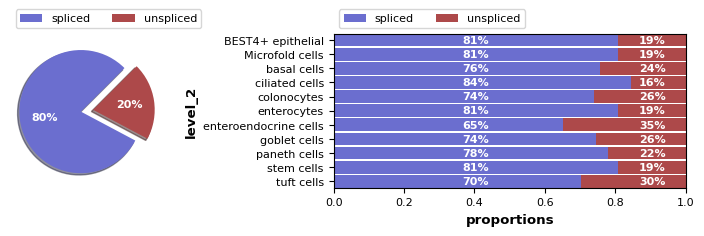

In [13]:
import scvelo as scv
scv.pl.proportions(adata, groupby='level_2')

In [12]:
adata.write(f'{Path}/Intestinal_epithelial_adata.h5ad')